# Análisis Exploratorio de Datos (EDA) – Airbnb NYC 2019

En este notebook se realiza un análisis exploratorio del dataset de anuncios de Airbnb en Nueva York (2019).
El objetivo es:

- Entender la estructura y calidad del dataset.
- Analizar la distribución de las variables principales (precio, tipo de habitación, localización, etc.).
- Detectar valores atípicos (outliers) y problemas de calidad de datos.
- Preparar un conjunto de datos limpio y procesado, listo para entrenar modelos de Machine Learning
  (por ejemplo, para predecir el precio de un anuncio).

Al final, guardo los datasets procesados en la carpeta `./data/processed` como pide el enunciado.

In [24]:
import os
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy._core.defchararray import upper
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1. Carga de datos y revisión inicial

En esta sección se carga el dataset original y se revisan:

- Dimensiones (número de filas y columnas).
- Tipos de dato por columna.
- Porcentaje de valores nulos.
- Número de valores únicos y posibles duplicados.

Esto da una primera impresión de la calidad de la información disponible.

In [25]:
# Configuracion de estilo

sns.set(style="whitegrid")

# Rutas de datos

RAW_DIR = "./data/raw"
PROCESSED_DIR = "./data/processed"
os.makedirs(PROCESSED_DIR, exist_ok=True)

# Cargar dataset

url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
df_raw = pd.read_csv(url)

df = df_raw.copy()

In [26]:
# Mostrar las primeras filas del dataset

print('El dataframe contiene {} lineas y {} features.'.format(len(df), df.shape[1]))
print(df.columns)
df.head(5)

El dataframe contiene 48895 lineas y 16 features.
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
# Información general del dataset

print(f"Dimensiones del dataset: {df.shape}")
print(df.info())

Dimensiones del dataset: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  


In [28]:
# Conteo de valores nulos

print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [29]:
# Cantidad de valores únicos por columna

print(f"Valores unicos por columna: \n{df.nunique()}")

Valores unicos por columna: 
id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [30]:
nulls = df.isna().mean().sort_values(ascending=False)
dups = df.duplicated().sum()
print("Duplicados:", dups)
nulls.head(10)

Duplicados: 0


last_review            0.205583
reviews_per_month      0.205583
host_name              0.000429
name                   0.000327
neighbourhood_group    0.000000
neighbourhood          0.000000
id                     0.000000
host_id                0.000000
longitude              0.000000
latitude               0.000000
dtype: float64

In [31]:
# Estadísticas descriptivas de columnas numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


## 2. Limpieza inicial del dataset

En esta parte elimino columnas que no aportan valor al análisis o al modelado
y gestiono los nulos más evidentes.

Culumnas a eliminar:

- ID: Se dropea porque no es relevante para el analisis
- Name: Se dropea porque no guarda relacion con el resultado de la variable objetivo
- Host Name: No tiene relevancia para determinar el valor de la variable objetivo
- Last review: No es de importancia para el analisis
- Host ID: Dato irrelevante para determinar la variable objetivo

También se imputan a los valores nulos de `reviews_per_month` con 0, ya que se interpreta que la ausencia de datos de reseñas equivale a no tener reseñas.


In [32]:
# Columnas poco útiles para un modelo de precio (identificadores, texto libre, fechas)

cols_to_drop = ['id', 'name', 'host_name', 'host_id', 'last_review']

print("Shape antes del drop:", df.shape)     #  Shape antes del drop

df = df.drop(columns=cols_to_drop)

print("Shape después del drop:", df.shape)
print("Columnas restantes:", list(df.columns))

# Revisar de nuevo nulos tras el drop

print("Valores nulos por columna (tras drop):")
print(df.isnull().sum())

# En este dataset, típicamente 'reviews_per_month' tiene nulos => los rellenar con 0

if 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

print("Valores nulos después de imputar reviews_per_month:")
print(df.isnull().sum())

Shape antes del drop: (48895, 16)
Shape después del drop: (48895, 11)
Columnas restantes: ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Valores nulos por columna (tras drop):
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Valores nulos después de imputar reviews_per_month:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type           

## 3. Análisis univariante

### 3.1 Variables numéricas

 En esta parte se analizan la distribución individual de cada variable numérica.

Primero se filtran los outliers extremos del precio (por encima del percentil 99) para que los histogramas sean más interpretables. Después:
- Calculamos estadísticas descriptivas (media, mediana, percentiles).
- Visualizamos la distribución de cada variable con histogramas y densidad (KDE).

Esto ayuda a entender el rango típico de valores y la presencia de asimetrías o colas largas.

Nro de filas tras filtrar precios > p99 (799.00): 48421
Variables numéricas: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,count,mean,std,min,25%,50%,75%,max
latitude,48421.0,40.728906,0.054619,40.49979,40.68996,40.72290,40.76315,40.91306
longitude,48421.0,-73.951928,0.046163,-74.24442,-73.98284,-73.95548,-73.93595,-73.71299
price,48421.0,137.543917,103.789003,0.00000,69.00000,105.00000,175.00000,799.00000
minimum_nights,48421.0,6.979596,20.291590,1.00000,1.00000,3.00000,5.00000,1250.00000
number_of_reviews,48421.0,23.415130,44.699315,0.00000,1.00000,5.00000,24.00000,629.00000
reviews_per_month,48421.0,1.096826,1.601144,0.00000,0.04000,0.38000,1.60000,58.50000
calculated_host_listings_count,48421.0,7.179199,33.090786,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,48421.0,112.096198,131.253201,0.00000,0.00000,44.00000,224.00000,365.00000


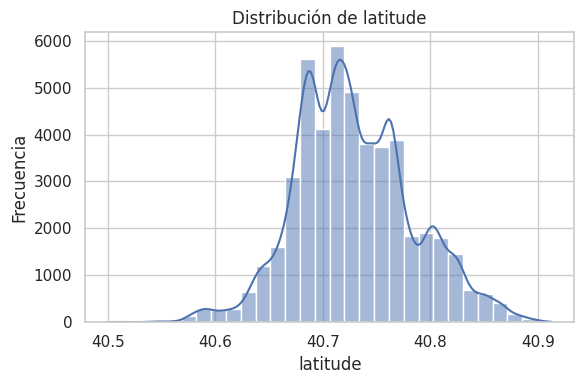

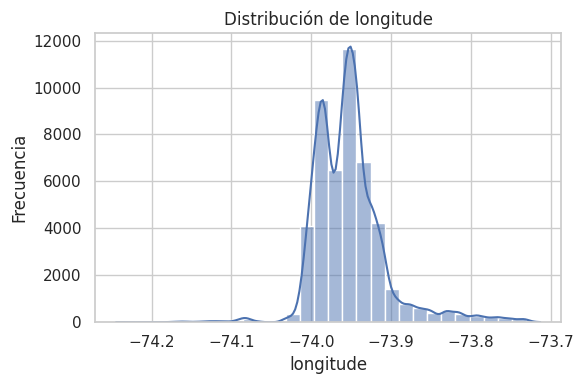

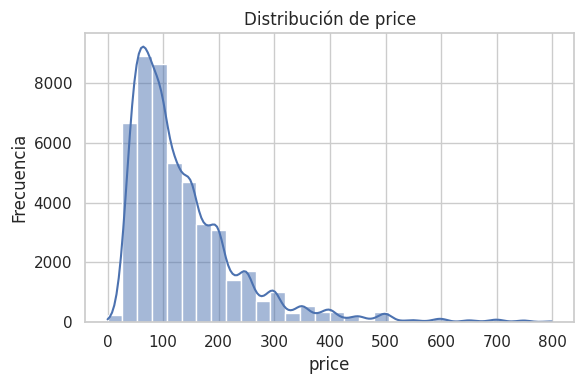

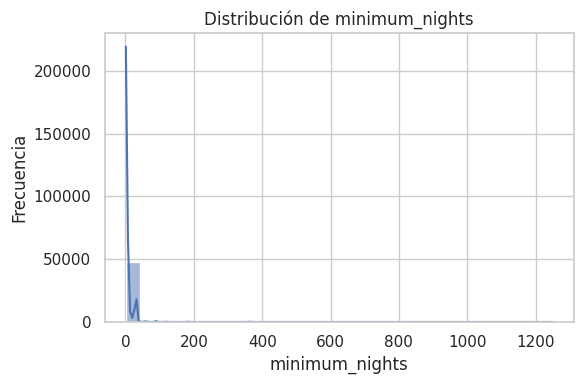

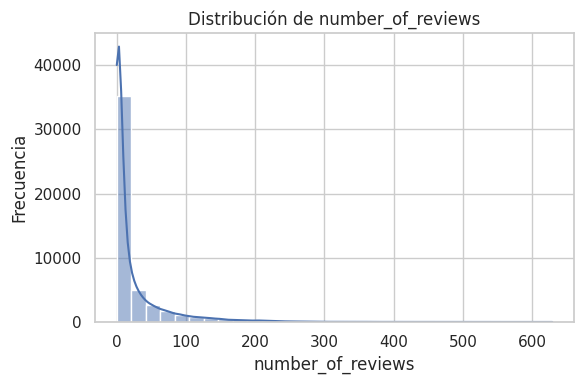

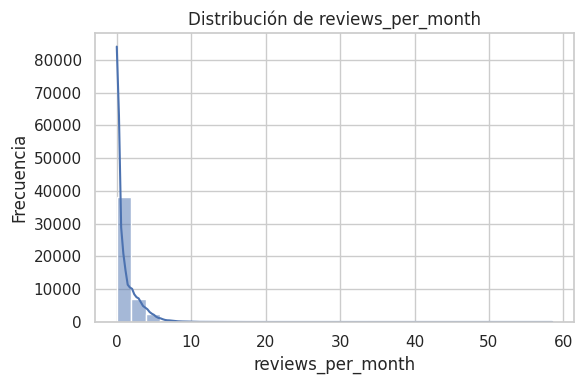

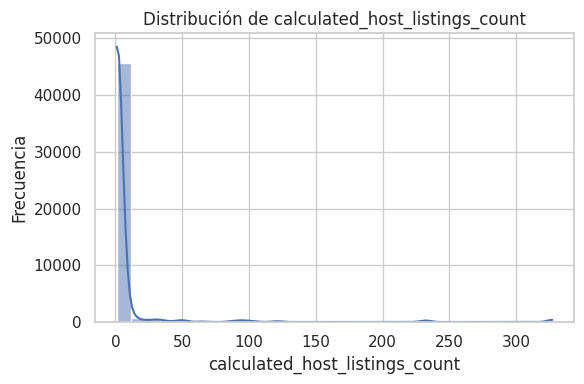

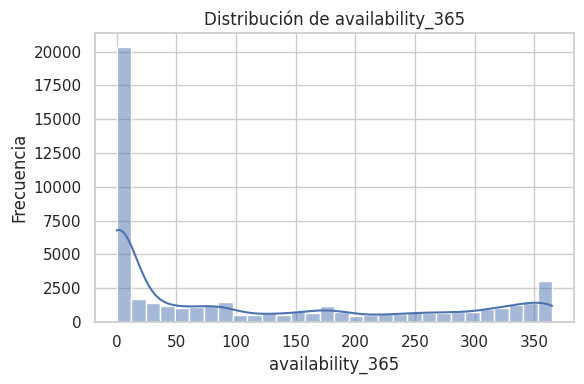

In [33]:
# Copia para EDA
df_eda = df.copy()

# Eliminar precios extremadamente altos (por encima del percentil 99)
price_p99 = df_eda['price'].quantile(0.99)
df_eda = df_eda[df_eda['price'] <= price_p99]

print(f"Nro de filas tras filtrar precios > p99 ({price_p99:.2f}):", df_eda.shape[0])

# Selección de variables numéricas
num_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", num_cols)

# Resumen estadístico
display(df_eda[num_cols].describe().T)

# Histograma individual por variable numérica
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_eda, x=col, bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


### 3.2 Variables categóricas

Ahora analizamos la distribución de las variables categóricas.
Cuando el número de categorías es muy grande, se agrupan en "Otros" 
a partir de las 10 categorías más frecuentes.

In [34]:
# Seleccionamos columnas categóricas

cat_cols = df_eda.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas a analizar:", cat_cols)

Columnas categóricas a analizar: ['neighbourhood_group', 'neighbourhood', 'room_type']


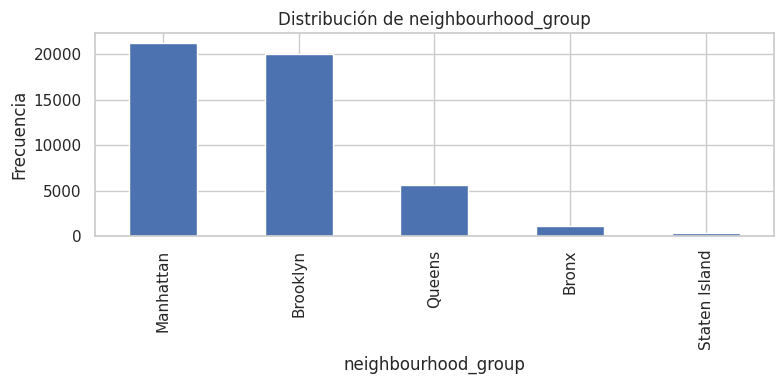

'neighbourhood' tiene 220 categorías -> muestro top 10 + 'Otros'.


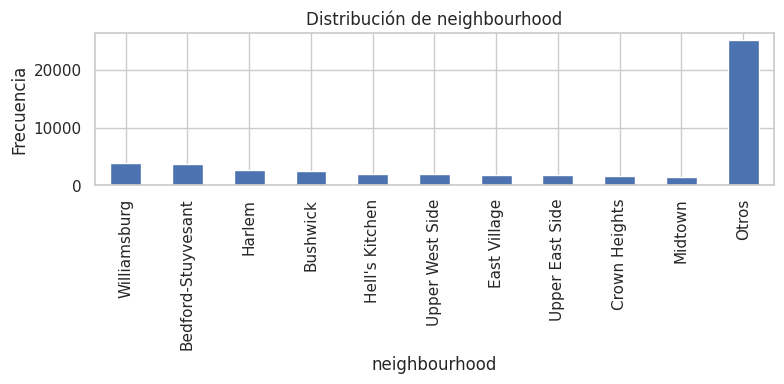

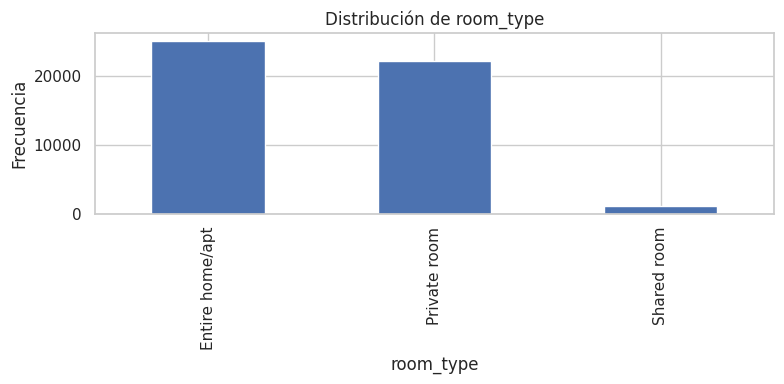

In [35]:
for col in cat_cols:
    n_unique = df_eda[col].nunique(dropna=True)

    # Agrupar en "Otros" si hay muchas categorías
    if n_unique > 10:
        print(f"'{col}' tiene {n_unique} categorías -> muestro top 10 + 'Otros'.")
        top_counts = df_eda[col].value_counts().nlargest(10)
        others_count = df_eda[col].value_counts().iloc[10:].sum()
        counts = pd.concat([top_counts, pd.Series({'Otros': others_count})])
    else:
        counts = df_eda[col].value_counts()

    if counts.size <= 1:
        print(f"Se omite '{col}' (sin variabilidad).")
        continue

    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

AGREGAR CONCLUSIONES DE CADA ANALISIS UNIVARIANTE TANTO NUMERICO COMO CATEGORICO DE CADA  COLUMNA

## 4. Análisis multivariante: relaciones con el precio

Estudio cómo varía el precio en función de:
- El tipo de habitación (`room_type`) mediante boxplots.
- La zona (`neighbourhood_group`) mediante barras de precio medio.
- La localización geográfica (latitud/longitud) mediante un mapa de dispersión coloreado por precio.
- El vecindario (`neighbourhood`) en términos de los 10 barrios más caros.

Este análisis permite entender qué zonas y tipos de alojamiento tienden a tener precios más altos.

### 4.1 Mapa de correlaciones

Para explorar las relaciones lineales entre variables, se construye una matriz de correlación.

Las variables categóricas se transforman temporalmente en códigos numéricos mediante `factorize`.
Esto permite incluirlas en una matriz de correlación, aunque hay que interpretar
estas correlaciones con cautela, ya que los códigos numéricos no representan un orden real.

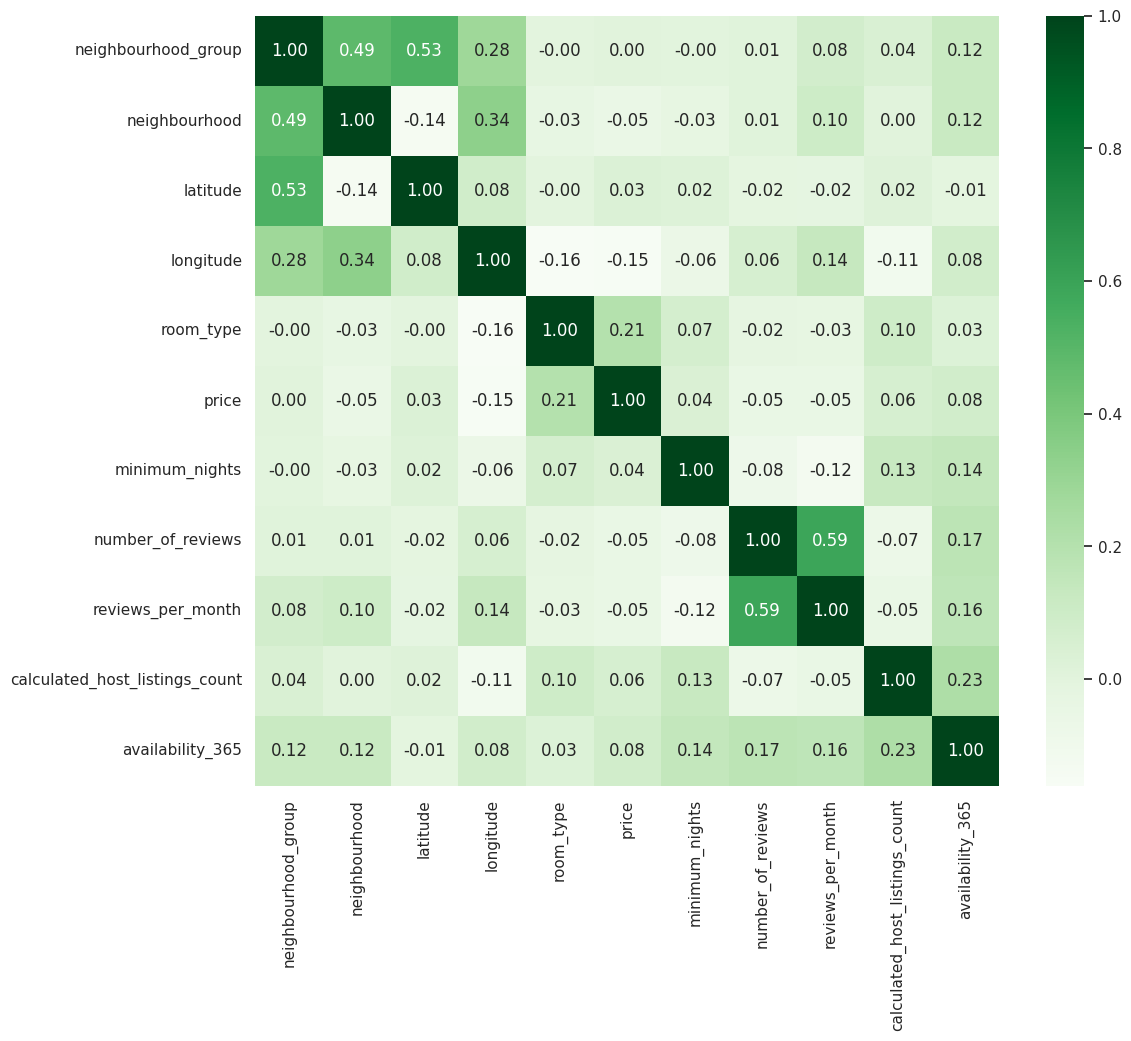

In [36]:
df_corr = df.copy()

transformation_rules = {}

for col in cat_cols:
    df_corr[col], uniques = pd.factorize(df_corr[col])
    
    rules_dict = {name: code for code, name in enumerate(uniques)}
    transformation_rules[col] = rules_dict
    
    with open(f"./{col}_transformation_rules.json", "w") as f:
        json.dump(rules_dict, f)


corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens', cbar=True)
plt.show()

## 5. Detección y tratamiento de outliers

Identifico y trato outliers en variables como:
- `minimum_nights`
- `number_of_reviews`
- `reviews_per_month`
- `availability_365`

Utilizo el criterio del rango intercuartílico (IQR) para definir límites superiores e inferiores.
Los valores que quedan fuera de estos límites se recortan al valor máximo/mínimo permitido.

Guardo la información de los límites utilizados para poder reproducir el proceso.

In [37]:
# Se guardan todos los datasets

total_data_CON_outliers = df.copy()
total_data_SIN_outliers = df.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]

def replace_outliers(column, df):
  col_stats = df[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}

for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

outliers_dict # Debe guardarse este JSON

# Guardar información de outliers

with open(os.path.join(PROCESSED_DIR, "outliers_limits.json"), "w") as f:
    json.dump(outliers_dict, f, indent=4)

total_data_CON_outliers.to_csv(os.path.join(PROCESSED_DIR, "total_con_outliers.csv"), index=False)
total_data_SIN_outliers.to_csv(os.path.join(PROCESSED_DIR, "total_sin_outliers.csv"), index=False)

### 5.1 Relación entre precio y variables categóricas

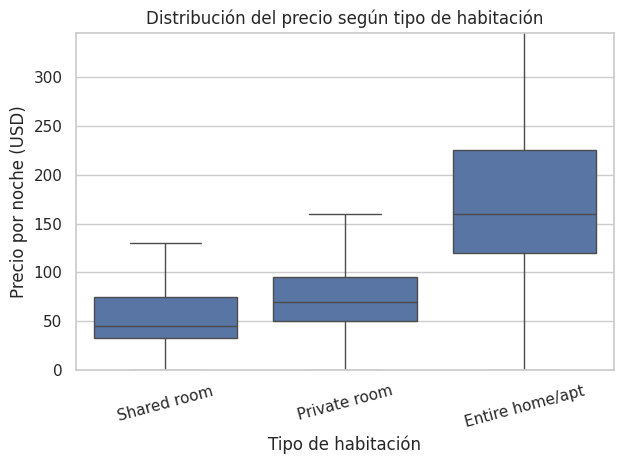

In [38]:
# Relación entre tipo de habitación y precio

order = df_eda.groupby('room_type')['price'].median().sort_values().index   # Ordena tipos de habitación por precio mediano
y_max = np.percentile(df_eda['price'], 95)  # Acotar eje Y para evitar valores exagerados

sns.boxplot(
    data=df_eda,
    x='room_type',
    y='price',
    order=order,
    showfliers=False
)

plt.ylim(0, y_max)
plt.title("Distribución del precio según tipo de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio por noche (USD)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

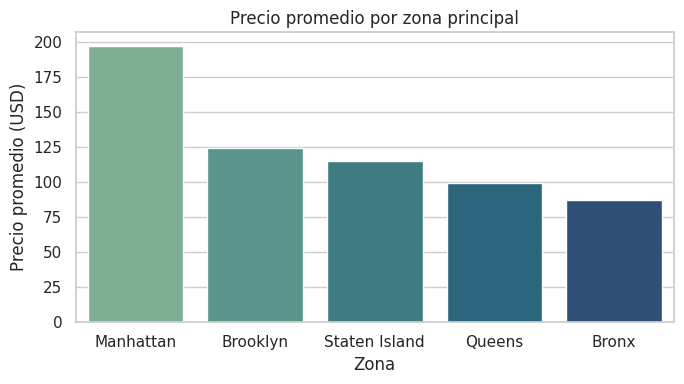

In [39]:
# Relación entre neighbourhood_group y precio promedio

# Precio promedio por zona principal
plt.figure(figsize=(7,4))
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(
    data=avg_price,
    x='neighbourhood_group',
    y='price',
    hue='neighbourhood_group',
    palette="crest",
    legend=False
)
plt.title("Precio promedio por zona principal")
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Zona")
plt.tight_layout()
plt.show()

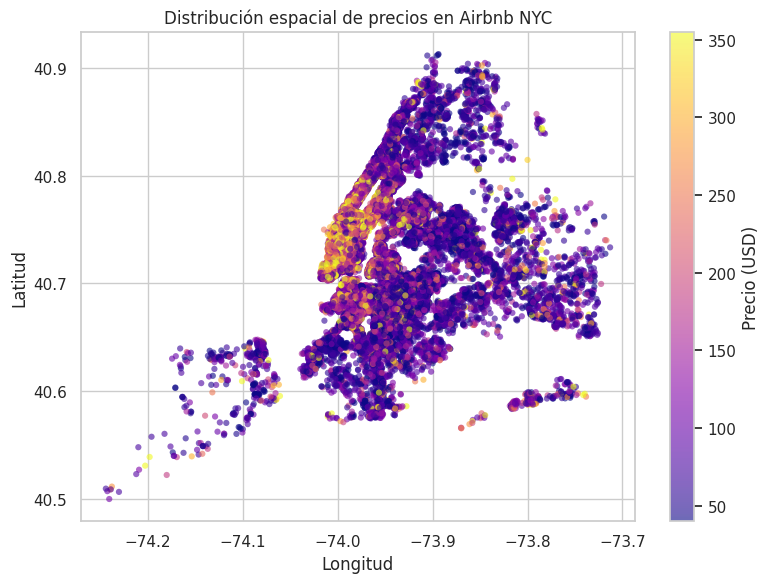

In [40]:
# Distribución espacial de precios

plt.figure(figsize=(8, 6))

# Calculo de percentiles para acotar rango de colores

vmin, vmax = np.percentile(df['price'], [5, 95])

# Grafico de los puntos de latitud y longitud, usando el precio como color

scatter = plt.scatter(
    data=df,
    x='longitude',
    y='latitude',
    c='price',
    cmap='plasma',
    s=20,
    alpha=0.6,
    edgecolors='none',
    vmin=vmin,
    vmax=vmax
)

plt.title("Distribución espacial de precios en Airbnb NYC", fontsize=12)
plt.xlabel("Longitud")
plt.ylabel("Latitud")

cbar = plt.colorbar(scatter)    # Barra de colores
cbar.set_label("Precio (USD)")

plt.tight_layout()
plt.show()

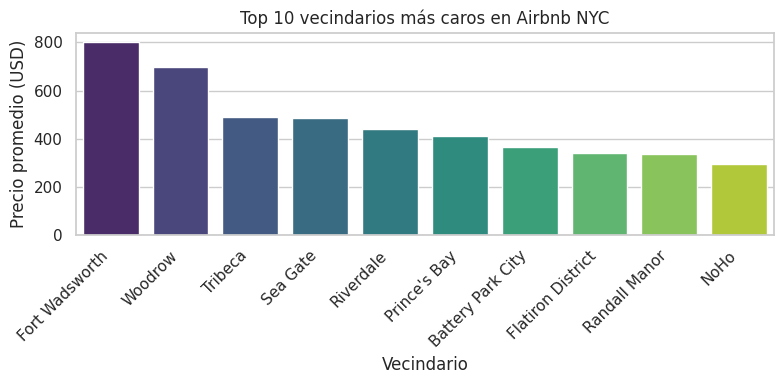

In [41]:
# Top 10 vecindarios más caros en Airbnb NYC

# Calculo del precio promedio por vecindario

top_neighbourhoods = (df.groupby('neighbourhood')['price'].mean().nlargest(10).reset_index())

plt.figure(figsize=(8, 4))

sns.barplot(
    data=top_neighbourhoods,
    x='neighbourhood',
    y='price',
    hue='neighbourhood',
    palette="viridis",
    legend=False             
)

plt.title("Top 10 vecindarios más caros en Airbnb NYC", fontsize=12)
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Vecindario")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 6. Preparación del dataset para modelado

A partir del dataset usado en el EDA (sin ciertos outliers de precio), se prepara un conjunto de datos para entrenar modelos de Machine Learning:

- Definimos el target (`price`) y las variables predictoras.
- Se divide el dataset en train y test.
- Aplicamos one-hot encoding a las variables categóricas.
- Escalamos las variables numéricas con `StandardScaler`.

Al final obtenemos matrices `X_train_scaled` y `X_test_scaled` listas para entrenar modelos de regresión.

### 6.1. Definir target y features

In [42]:
df_model = df_eda.copy()

target = 'price'
X = df_model.drop(columns=[target])
y = df_model[target]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)

X_train: (38736, 10) X_test: (9685, 10)


### 6.2. One-hot encoding de categóricas

In [43]:
# Identificar columnas numéricas y categóricas en X_train

num_cols_model = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_model = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numéricas (modelo):", num_cols_model)
print("Categóricas (modelo):", cat_cols_model)

# One-hot encoding
X_train_enc = pd.get_dummies(X_train, columns=cat_cols_model, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols_model, drop_first=True)

# Alinear columnas de train y test (por si falta alguna dummy en test)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print("X_train_enc:", X_train_enc.shape)
print("X_test_enc:", X_test_enc.shape)

Numéricas (modelo): ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categóricas (modelo): ['neighbourhood_group', 'neighbourhood', 'room_type']
X_train_enc: (38736, 232)
X_test_enc: (9685, 232)


### 6.3. Escalado de variables numéricas

Guardado de los datasets procesados en la carpeta `./data/processed`.
Estos archivos no se suben a git (deben estar listados en `.gitignore`).

In [44]:
scaler = StandardScaler()

X_train_scaled = X_train_enc.copy()
X_test_scaled = X_test_enc.copy()

X_train_scaled[num_cols_model] = scaler.fit_transform(X_train_enc[num_cols_model])
X_test_scaled[num_cols_model] = scaler.transform(X_test_enc[num_cols_model])

# Comprobación rápida
display(X_train_scaled.head())

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
2996,0.061041,-1.027872,-0.101007,-0.237229,-0.553497,-0.187046,0.417688,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6068,1.716156,0.055115,-0.101007,0.321306,-0.217621,-0.156949,1.674108,False,True,False,...,False,False,False,False,False,False,False,False,False,False
13866,-0.192465,1.484230,-0.153108,1.550082,0.696709,-0.096756,1.476126,False,False,True,...,False,False,False,False,False,False,False,False,False,False
28834,-0.199242,0.218933,-0.257310,0.500037,1.163204,-0.187046,0.965944,True,False,False,...,False,True,False,False,False,False,False,False,False,False
40383,-1.261805,4.215192,-0.257310,-0.103181,2.083754,-0.187046,0.265394,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## 7. Guardado de datasets procesados

Guardamos los diferentes datasets procesados en la carpeta `./data/processed`:

- Dataset limpio para EDA.
- Conjuntos de train y test escalados.
- Vectores `y_train` y `y_test`.

In [45]:
# Guardar datasets EDA y modelado
df_eda.to_csv(os.path.join(PROCESSED_DIR, "ab_nyc_2019_eda.csv"), index=False)

X_train_scaled.to_csv(os.path.join(PROCESSED_DIR, "X_train_scaled.csv"), index=False)
X_test_scaled.to_csv(os.path.join(PROCESSED_DIR, "X_test_scaled.csv"), index=False)
y_train.to_csv(os.path.join(PROCESSED_DIR, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(PROCESSED_DIR, "y_test.csv"), index=False)

print("Archivos guardados en:", PROCESSED_DIR)

Archivos guardados en: ./data/processed
